In [1]:
import numpy as np
import matplotlib.pyplot as plt
#Las siguientes librerías son para comprobar que todo salga bien en el generador lineal congruencial
import pandas as pd
import seaborn as sns
import time 

# Generadores Lineales Congruenciales

Los métodos más comunes para generar sucesiones de números aleatorios utilizan los llamados generadores lineales congruenciales que genera una sucesión determinística de números por medio de la fórmula recursiva:

$$ X_{i+1}=(aX_i+c)(mod\;m)$$

donde el valor inicial $X_0$ es conocido como semilla y $a$, $c$ y $m$, todos enteros positivos, se llaman el multiplicador, el incremento y el módulo respectivamente.

Si c=0 el generador se conoce como generador congruencial multiplicativo.

### Definición
Definimos la sucesión de valores $\left\lbrace U_i\right\rbrace_{i\geq 1}$ como:
$$U_i := \frac{X_i}{m}$$


Estos números son conocidos como números pseudoaleatorios (debido a que son generados de una forma determinista ). Resulta que dicha sucesión es una aproximación a una sucesión de variables aleatorias uniformes en el (0,1)

Notemos que la sucesión sugerida se va a empezar a repetir a lo más a partir de $m$ pasos y que, por lo tanto, serán números periódicos con periodo no mayor a $m$. 

### Definición
El periodo del generador se define como :
$$k:= min \left\lbrace j\geq 1 | X_i=X_{i+j}\right\rbrace$$


### Ejemplo 
Sean $a=c=X_0=3$ y $m=5$. Entonces la sucesión obtenida de la fórmula recursiva
$$X_{i+1}=(3X_i+3)(mod \; 5)$$
es 3,2,4,0,3 la cual tiene periodo $4$

## Proposición
Sea $a$ un natural. Un generador tiene periodo $m$ ssi se cumple que: 

1.- El máximo común divisor de $c$ y $m$ es 1.

2.- $a\equiv 1 \, (mod\; p) $ para todo  primo $p$ factor de $m$

3.- $a\equiv 1 \, (mod\; 4) $ en el caso de que $m$ sea un múltiplo de $4$

Para las implementaciones en computadora, se escoge $m$ como un primo lo suficientemente grande que pueda ser soportado por la longitud de palabra en la computadora . Por ejemplo, en una compu con longitud de palabra de 32 bits se obtienen generadores bastante aceptables estadísticamente con $m=2^{31}-1$ y $a=7^5$. En este notebook usaremos esos valores como default además de $c=0$

In [2]:
def uniforme01(size,semilla=None,a=7**5,m=(2**(31))-1,c=0):
    #Utilizamos la semilla otorgada:
    if semilla is None:
        semilla= int(time.time_ns())
    X0=semilla
    #Inicializamos el lugar donde se guardarán los números aleatorios
    U=[]
    contador=len(U)
    while len(U)< size:
        X0=(a*X0+c)%m
        U.append((X0/m))
    return np.array(U)

Nótese que si el usuario no da una semilla, la función usa el tiempo de la computadora

A continuación vemos cómo es de buena o mala la aproximación de la sucesión : 

In [416]:
dict={"Info":uniforme01(10000,22)}
base=pd.DataFrame(dict)

<AxesSubplot:ylabel='Density'>

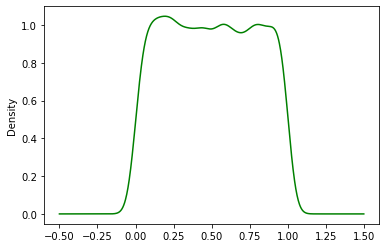

In [417]:
base.Info.plot.density(color="green")

Ahora, para simular parejas ordenadas, primero simulamos las coordenadas X y luego las coordenadas Y. Nótese que estamos cuidando que la semilla cambie entre la generación de X y la de Y, porque necesitamos que sean generados con diferentes semillas o si no todos terminarán sobre la recta identidad.

In [89]:
#Simular N parejas ordenadas en un arreglo de X's vs Y's
#def ParejasOrdenadas(N):
#    X=[]
#    Y=[]
#    nano=int(time.time_ns())
#    contador=1
#    for i in range(0,N):
#        X.append(uniforme01(1,semilla=(nano/contador)*np.exp(contador))[0])
#        Y.append(uniforme01(1,semilla=(nano/contador)*np.log(contador))[0])
#        nano=int(time.time_ns())
#        contador=(contador+1)%400+1
#    return X,Y

def ParejasOrdenadas(N):
    tiempo=time.time_ns()
    X=uniforme01(N)
    while (tiempo==time.time_ns()):
        tiempo=tiempo
    Y=uniforme01(N)
    return X,Y

Hacemos el estimador de pi, donde lo que realmente estamos estimando es: 
$$\frac{AreaCirculo}{AreaCuadrado}$$
de ahí aún hay que hacer unos cálculos para estimar Pi: 

In [90]:
def EstimadorPi(X,Y):
    Arreglo=[]
    for i in range(0,len(X)): 
        aux=np.array([X[i],Y[i]])-np.array([0.5,0.5])
        norma=np.linalg.norm(aux,ord=2)
        #print(norma)
        if norma<=0.5:
            Arreglo.append(1)
        else:
            Arreglo.append(0)
    return sum(Arreglo)/len(Arreglo)

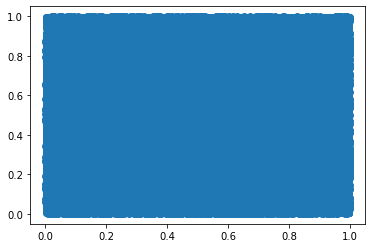

3.14944

In [91]:
X,Y=ParejasOrdenadas(100000)
plt.plot(X,Y,'o')
plt.show()
EstimadorPi(X,Y)/(0.5**2)

Ahora usamos Monte Carlo que nos dice que: 
$$E(g(X))=\int_{sop(X)}g(x)f(x)dx\approx \frac{1}{n}\sum_{i=1}^{n} g(X_i)$$
donde $\left\lbrace X_i\right\rbrace_{i\leq N}$ es una muestra aleatoria de la densidad $f(x)$ .
Lo usamos en las funciones:

1.- $f(x)=e^{-x^2}$


2.- $g(x)=x^3 -6x^2$

In [92]:
#Estimar integrales en intervalos y método Monte Carlo: 
def Estimacion(N,f=lambda x: np.exp(-x**2)):
    Dominio=2*uniforme01(N)
    return sum(f(Dominio))/N

In [94]:
Estimacion(100000)

0.44243993365144196

In [93]:
Estimacion(100000,f=lambda x: ((x**3)-((6)*(x**2))) )*2

-12.011094661209873